# Energy Forecast Data Analysis

This notebook analyzes the final training datasets for energy forecasting:
- **Daily experiments**: `building_daily_7_7.csv` (7 days input, 7 days output)
- **Hourly experiments**: `building_hourly_72_72.csv` (72 hours input, 72 hours output)

Each row represents a measurement from a heat consumption device, with weather features from meteostat and building characteristics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Daily Dataset Analysis (7-day forecast)

In [2]:
# Read daily dataset
daily_df = pd.read_csv('../data/processed/building_daily_7_7.csv')

# Convert datetime column
daily_df['datetime'] = pd.to_datetime(daily_df['datetime'])

print(f"Dataset shape: {daily_df.shape}")
print(f"Number of unique devices: {daily_df['id'].nunique()}")
print(f"Date range: {daily_df['datetime'].min()} to {daily_df['datetime'].max()}")
print(f"\nMemory usage: {daily_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: (56955, 48)
Number of unique devices: 132
Date range: 2017-03-21 00:00:00 to 2023-09-19 00:00:00

Memory usage: 24.25 MB


In [3]:
# Display first few rows
daily_df.head()

,id,datetime,diff,prcp,snow,wdir,wspd,wpgt,pres,tsun,daily_avg,heated_area,heated_area_lod,anzahlwhg,ground_surface,building_height,storeys_above_ground,weekend,holiday,hum_avg,hum_min,hum_max,tavg,tmin,tmax,diff(t-1),diff(t-2),diff(t-3),diff(t-4),diff(t-5),diff(t-6),diff(t-7),diff(t+1),diff(t+2),diff(t+3),diff(t+4),diff(t+5),diff(t+6),typ_0,typ_1,typ_2,typ_4,primary_energy_district heating,primary_energy_gas,day_of_month_sin,day_of_month_cos,weekday_sin,weekday_cos
0,400306gVG-0,2018-09-27,395.50,0.5,0.0,251.0,22.7,54.7,1020.9,222.0,431.116879,5002.0,NaN,60.0,NaN,NaN,NaN,0,1,81.000000,66.0,95.0,17.1,14.3,20.9,411.32,420.36,406.80,450.87,431.66,438.44,413.58,390.98,422.62,452.00,424.88,433.92,455.39,1.0,0.0,0.0,0.0,0.0,1.0,-0.724793,0.688967,-4.338837e-01,-0.900969
1,400306gVG-0,2018-09-28,390.98,0.9,0.0,307.0,23.4,49.3,1021.2,600.0,431.116879,5002.0,NaN,60.0,NaN,NaN,NaN,0,1,66.708333,52.0,89.0,11.8,8.2,14.4,395.50,411.32,420.36,406.80,450.87,431.66,438.44,422.62,452.00,424.88,433.92,455.39,414.71,1.0,0.0,0.0,0.0,0.0,1.0,-0.571268,0.820763,-9.749279e-01,-0.222521
2,400306gVG-0,2018-09-29,422.62,0.0,0.0,247.0,10.4,44.3,1025.1,498.0,431.116879,5002.0,NaN,60.0,NaN,NaN,NaN,1,1,75.583333,48.0,97.0,9.2,2.0,15.2,390.98,395.50,411.32,420.36,406.80,450.87,431.66,452.00,424.88,433.92,455.39,414.71,428.27,1.0,0.0,0.0,0.0,0.0,1.0,-0.394356,0.918958,-7.818315e-01,0.623490
3,400306gVG-0,2018-09-30,452.00,0.1,0.0,201.0,10.1,33.1,1014.8,186.0,431.116879,5002.0,NaN,60.0,NaN,NaN,NaN,1,1,71.541667,48.0,88.0,9.5,4.7,15.1,422.62,390.98,395.50,411.32,420.36,406.80,450.87,424.88,433.92,455.39,414.71,428.27,442.96,1.0,0.0,0.0,0.0,0.0,1.0,-0.201299,0.979530,-2.449294e-16,1.000000
4,400306gVG-0,2018-10-01,424.88,4.0,0.0,255.0,11.2,36.4,1010.5,156.0,431.116879,5002.0,NaN,60.0,NaN,NaN,NaN,0,1,83.625000,63.0,94.0,9.4,5.4,13.9,452.00,422.62,390.98,395.50,411.32,420.36,406.80,433.92,455.39,414.71,428.27,442.96,457.65,1.0,0.0,0.0,0.0,0.0,1.0,0.201299,0.979530,7.818315e-01,0.623490


In [4]:
# Check data types and missing values
print("Data types and missing values:")
info_df = pd.DataFrame({
    'Column': daily_df.columns,
    'Type': daily_df.dtypes.values,
    'Non-Null Count': daily_df.count().values,
    'Missing': daily_df.isnull().sum().values,
    'Missing %': (daily_df.isnull().sum() / len(daily_df) * 100).values
})
print(info_df.to_string(index=False))

Data types and missing values:
                         Column           Type  Non-Null Count  Missing  Missing %
                             id         object           56955        0   0.000000
                       datetime datetime64[ns]           56955        0   0.000000
                           diff        float64           56955        0   0.000000
                           prcp        float64           56955        0   0.000000
                           snow        float64           53018     3937   6.912475
                           wdir        float64           56955        0   0.000000
                           wspd        float64           56955        0   0.000000
                           wpgt        float64           56955        0   0.000000
                           pres        float64           56955        0   0.000000
                           tsun        float64           56955        0   0.000000
                      daily_avg        float64          

### Feature Descriptions (Daily Dataset)

#### 1. Identification & Target
- **id**: Device identifier for the heat meter
- **datetime**: Timestamp of the measurement
- **diff**: Heat consumption in kW (target variable to predict)

#### 2. Weather Features (from Meteostat)
- **prcp**: Precipitation in mm
- **snow**: Snow depth in mm
- **wdir**: Wind direction in degrees
- **wspd**: Wind speed in km/h
- **wpgt**: Peak wind gust in km/h
- **pres**: Atmospheric pressure in hPa
- **tsun**: Daily sunshine duration in minutes
- **hum_avg**: Average relative humidity (%)
- **hum_min**: Minimum relative humidity (%)
- **hum_max**: Maximum relative humidity (%)
- **tavg**: Average temperature (°C)
- **tmin**: Minimum temperature (°C)
- **tmax**: Maximum temperature (°C)

#### 3. Building Characteristics
- **heated_area**: Size of the apartment/building in square meters
- **heated_area_lod**: Heated area from LOD (Linked Open Data) - alternative source
- **anzahlwhg**: Number of apartments/dwellings in the building
- **ground_surface**: Ground surface area
- **building_height**: Height of the building
- **storeys_above_ground**: Number of floors above ground

#### 4. Temporal Features
- **weekend**: Binary indicator (1 if weekend, 0 otherwise)
- **holiday**: Binary indicator (1 if holiday, 0 otherwise)
- **day_of_month_sin**: Sine encoding of day of month (cyclical)
- **day_of_month_cos**: Cosine encoding of day of month (cyclical)
- **weekday_sin**: Sine encoding of weekday (cyclical)
- **weekday_cos**: Cosine encoding of weekday (cyclical)

#### 5. Aggregate Features
- **daily_avg**: Average daily consumption value for this device

#### 6. Lagged Features (Historical consumption)
- **diff(t-1) to diff(t-7)**: Heat consumption from 1 to 7 days ago

#### 7. Future Features (For training only)
- **diff(t+1) to diff(t+6)**: Heat consumption from 1 to 6 days ahead

#### 8. Building Type (One-hot encoded)
- **typ_0, typ_1, typ_2, typ_4**: Building type categories

#### 9. Primary Energy Source (One-hot encoded)
- **primary_energy_district heating**: Binary indicator for district heating
- **primary_energy_gas**: Binary indicator for gas heating

In [14]:
# Summary statistics for target variable and key features
print("Summary statistics for key columns:\n")
key_cols = ['diff', 'tavg', 'tmin', 'tmax', 'prcp', 'heated_area']
daily_df[key_cols].describe()

Summary statistics for key columns:



,diff,tavg,tmin,tmax,prcp,heated_area
count,56955.000000,56955.000000,56955.000000,56955.000000,56955.000000,56955.000000
mean,2637.788475,10.254741,6.042915,14.352201,1.955077,6625.930500
std,5089.399679,6.630165,5.927609,7.969503,4.049570,8861.446446
min,0.000000,-10.600000,-19.300000,-7.300000,0.000000,250.000000
25%,442.000000,5.200000,1.600000,8.000000,0.000000,1994.000000
50%,953.720000,9.600000,5.700000,13.700000,0.100000,3572.000000
75%,2690.530000,15.600000,10.800000,20.600000,2.100000,6904.000000
max,62481.090000,28.600000,22.000000,40.100000,62.500000,49339.000000


## Hourly Dataset Analysis (72-hour forecast)

In [6]:
# Read hourly dataset
hourly_df = pd.read_csv('../data/processed/building_hourly_72_72.csv')

# Convert datetime column
hourly_df['datetime'] = pd.to_datetime(hourly_df['datetime'])

print(f"Dataset shape: {hourly_df.shape}")
print(f"Number of unique devices: {hourly_df['id'].nunique()}")
print(f"Date range: {hourly_df['datetime'].min()} to {hourly_df['datetime'].max()}")
print(f"\nMemory usage: {hourly_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: (142085, 176)
Number of unique devices: 44
Date range: 2021-05-11 20:00:00 to 2023-09-22 08:00:00

Memory usage: 202.65 MB


In [7]:
# Display first few rows
hourly_df.head()

,id,datetime,diff,prcp,snow,wdir,wspd,wpgt,pres,tsun,daily_avg,heated_area,heated_area_lod,anzahlwhg,ground_surface,building_height,storeys_above_ground,weekend,holiday,temp,dwpt,rhum,coco,diff(t-1),diff(t-2),diff(t-3),diff(t-4),diff(t-5),diff(t-6),diff(t-7),diff(t-8),diff(t-9),diff(t-10),diff(t-11),diff(t-12),diff(t-13),diff(t-14),diff(t-15),diff(t-16),diff(t-17),diff(t-18),diff(t-19),diff(t-20),diff(t-21),diff(t-22),diff(t-23),diff(t-24),diff(t-25),diff(t-26),diff(t-27),diff(t-28),diff(t-29),diff(t-30),diff(t-31),diff(t-32),diff(t-33),diff(t-34),diff(t-35),diff(t-36),diff(t-37),diff(t-38),diff(t-39),diff(t-40),diff(t-41),diff(t-42),diff(t-43),diff(t-44),diff(t-45),diff(t-46),diff(t-47),diff(t-48),diff(t-49),diff(t-50),diff(t-51),diff(t-52),diff(t-53),diff(t-54),diff(t-55),diff(t-56),diff(t-57),diff(t-58),diff(t-59),diff(t-60),diff(t-61),diff(t-62),diff(t-63),diff(t-64),diff(t-65),diff(t-66),diff(t-67),diff(t-68),diff(t-69),diff(t-70),diff(t-71),diff(t-72),diff(t+1),diff(t+2),diff(t+3),diff(t+4),diff(t+5),diff(t+6),diff(t+7),diff(t+8),diff(t+9),diff(t+10),diff(t+11),diff(t+12),diff(t+13),diff(t+14),diff(t+15),diff(t+16),diff(t+17),diff(t+18),diff(t+19),diff(t+20),diff(t+21),diff(t+22),diff(t+23),diff(t+24),diff(t+25),diff(t+26),diff(t+27),diff(t+28),diff(t+29),diff(t+30),diff(t+31),diff(t+32),diff(t+33),diff(t+34),diff(t+35),diff(t+36),diff(t+37),diff(t+38),diff(t+39),diff(t+40),diff(t+41),diff(t+42),diff(t+43),diff(t+44),diff(t+45),diff(t+46),diff(t+47),diff(t+48),diff(t+49),diff(t+50),diff(t+51),diff(t+52),diff(t+53),diff(t+54),diff(t+55),diff(t+56),diff(t+57),diff(t+58),diff(t+59),diff(t+60),diff(t+61),diff(t+62),diff(t+63),diff(t+64),diff(t+65),diff(t+66),diff(t+67),diff(t+68),diff(t+69),diff(t+70),diff(t+71),typ_0,typ_1,typ_2,typ_4,primary_energy_district heating,primary_energy_gas,weekday_sin,weekday_cos,day_of_month_sin,day_of_month_cos
0,841ccf85-04b7-11ec-9d61-02b402f0c1de-0-0,2022-10-22 13:00:00,2.0,0.0,0.0,270.0,11.9,25.0,1013.3,60.0,70.571955,9456.0,NaN,24,NaN,NaN,NaN,1,0,18.2,13.7,75.0,1.0,10.0,17.0,29.0,25.0,25.0,30.0,48.0,123.0,35.0,32.0,38.0,33.0,35.0,36.0,35.0,34.0,34.0,29.0,28.0,22.0,19.0,48.0,75.0,75.0,82.0,80.0,88.0,89.0,103.0,90.0,95.0,93.0,87.0,113.0,130.0,38.0,43.0,37.0,36.0,36.0,36.0,27.0,25.0,15.0,15.0,34.0,68.0,75.0,81.0,86.0,85.0,90.0,105.0,91.0,96.0,92.0,86.0,111.0,131.0,33.0,26.0,29.0,25.0,23.0,22.0,21.0,16.0,13.0,12.0,28.0,58.0,59.0,1.0,3.0,2.0,24.0,20.0,5.0,16.0,1.0,14.0,44.0,74.0,16.0,21.0,18.0,22.0,51.0,26.0,32.0,25.0,26.0,17.0,3.0,2.0,2.0,2.0,105.0,31.0,6.0,12.0,36.0,7.0,62.0,57.0,15.0,18.0,19.0,169.0,70.0,56.0,14.0,0.0,0.0,0.0,0.0,0.0,142.0,32.0,29.0,32.0,8.0,14.0,15.0,13.0,23.0,20.0,1.0,12.0,14.0,19.0,16.0,88.0,46.0,54.0,45.0,51.0,47.0,52.0,48.0,47.0,48.0,46.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,6.123234e-17,-0.5,0.866025
1,841ccf85-04b7-11ec-9d61-02b402f0c1de-0-0,2022-10-22 14:00:00,1.0,0.0,0.0,260.0,14.8,24.0,1013.4,60.0,70.571955,9456.0,NaN,24,NaN,NaN,NaN,1,0,18.7,13.3,71.0,1.0,2.0,10.0,17.0,29.0,25.0,25.0,30.0,48.0,123.0,35.0,32.0,38.0,33.0,35.0,36.0,35.0,34.0,34.0,29.0,28.0,22.0,19.0,48.0,75.0,75.0,82.0,80.0,88.0,89.0,103.0,90.0,95.0,93.0,87.0,113.0,130.0,38.0,43.0,37.0,36.0,36.0,36.0,27.0,25.0,15.0,15.0,34.0,68.0,75.0,81.0,86.0,85.0,90.0,105.0,91.0,96.0,92.0,86.0,111.0,131.0,33.0,26.0,29.0,25.0,23.0,22.0,21.0,16.0,13.0,12.0,28.0,58.0,3.0,2.0,24.0,20.0,5.0,16.0,1.0,14.0,44.0,74.0,16.0,21.0,18.0,22.0,51.0,26.0,32.0,25.0,26.0,17.0,3.0,2.0,2.0,2.0,105.0,31.0,6.0,12.0,36.0,7.0,62.0,57.0,15.0,18.0,19.0,169.0,70.0,56.0,14.0,0.0,0.0,0.0,0.0,0.0,142.0,32.0,29.0,32.0,8.0,14.0,15.0,13.0,23.0,20.0,1.0,12.0,14.0,19.0,16.0,88.0,46.0,54.0,45.0,51.0,47.0,52.0,48.0,47.0,48.0,46.0,43.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,6.123234e-17,-0.5,0.866025
2,841ccf85-04b7-11ec-9d61-02b402f0c1de-0-0,2022-10-22 15:00:00,3.0,0.0,0.0,270.0,13.3,25.0,1013.8,60.0,70.571955,9456.0,NaN,24,NaN,NaN,NaN,1,0,18.5,13.1,71.0,3.0,1.0,2.0,10.0,17.0,29.0,25.0,25.0,30.0,48.0,123.0,35.0,32.0,38.0,33.0,35.0,36.0,35.0,34.0,34.0,29.0,28.0,22.0,19.0

In [8]:
# Check data types and missing values for a subset of columns (too many to display all)
print("Data types and missing values for non-lagged features:")
# Get columns that are not lagged features (diff(t-*) or diff(t+*))
non_lagged_cols = [col for col in hourly_df.columns if not col.startswith('diff(t')]
info_df_hourly = pd.DataFrame({
    'Column': non_lagged_cols,
    'Type': hourly_df[non_lagged_cols].dtypes.values,
    'Non-Null Count': hourly_df[non_lagged_cols].count().values,
    'Missing': hourly_df[non_lagged_cols].isnull().sum().values,
    'Missing %': (hourly_df[non_lagged_cols].isnull().sum() / len(hourly_df) * 100).values
})
print(info_df_hourly.to_string(index=False))

Data types and missing values for non-lagged features:
                         Column           Type  Non-Null Count  Missing  Missing %
                             id         object          142085        0        0.0
                       datetime datetime64[ns]          142085        0        0.0
                           diff        float64          142085        0        0.0
                           prcp        float64          142085        0        0.0
                           snow        float64          142085        0        0.0
                           wdir        float64          142085        0        0.0
                           wspd        float64          142085        0        0.0
                           wpgt        float64          142085        0        0.0
                           pres        float64          142085        0        0.0
                           tsun        float64          142085        0        0.0
                      daily_avg 

### Feature Descriptions (Hourly Dataset)

#### 1. Identification & Target
- **id**: Device identifier for the heat meter
- **datetime**: Timestamp of the measurement (hourly)
- **diff**: Heat consumption in kW (target variable to predict)

#### 2. Weather Features (from Meteostat - hourly)
- **prcp**: Precipitation in mm
- **snow**: Snow depth in mm
- **wdir**: Wind direction in degrees
- **wspd**: Wind speed in km/h
- **wpgt**: Peak wind gust in km/h
- **pres**: Atmospheric pressure in hPa
- **tsun**: Sunshine duration in minutes (for that hour)
- **temp**: Temperature (°C) - hourly measurement
- **dwpt**: Dew point temperature (°C)
- **rhum**: Relative humidity (%)
- **coco**: Weather condition code

#### 3. Building Characteristics
Same as daily dataset:
- **heated_area**: Size of the apartment/building in square meters
- **heated_area_lod**: Heated area from LOD (Linked Open Data) - alternative source
- **anzahlwhg**: Number of apartments/dwellings in the building
- **ground_surface**: Ground surface area
- **building_height**: Height of the building
- **storeys_above_ground**: Number of floors above ground

#### 4. Temporal Features
- **weekend**: Binary indicator (1 if weekend, 0 otherwise)
- **holiday**: Binary indicator (1 if holiday, 0 otherwise)
- **weekday_sin**: Sine encoding of weekday (cyclical)
- **weekday_cos**: Cosine encoding of weekday (cyclical)
- **day_of_month_sin**: Sine encoding of day of month (cyclical)
- **day_of_month_cos**: Cosine encoding of day of month (cyclical)

#### 5. Aggregate Features
- **daily_avg**: Average daily consumption value for this device

#### 6. Lagged Features (Historical consumption)
- **diff(t-1) to diff(t-72)**: Heat consumption from 1 to 72 hours ago (past 3 days)

#### 7. Future Features (For training only)
- **diff(t+1) to diff(t+71)**: Heat consumption from 1 to 71 hours ahead

#### 8. Building Type (One-hot encoded)
- **typ_0, typ_1, typ_2, typ_4**: Building type categories

#### 9. Primary Energy Source (One-hot encoded)
- **primary_energy_district heating**: Binary indicator for district heating
- **primary_energy_gas**: Binary indicator for gas heating

In [15]:
# Summary statistics for target variable and key features
print("Summary statistics for key columns:\n")
key_cols_hourly = ['diff', 'temp', 'dwpt', 'rhum', 'prcp', 'heated_area']
hourly_df[key_cols_hourly].describe()

Summary statistics for key columns:



,diff,temp,dwpt,rhum,prcp,heated_area
count,142085.000000,142085.000000,142085.000000,142085.000000,142085.000000,142085.000000
mean,51.641064,11.367469,6.150918,73.935046,0.073712,3996.912356
std,79.796995,8.083943,5.994938,19.326889,0.441323,2786.201472
min,0.000000,-19.100000,-21.400000,13.000000,0.000000,738.000000
25%,3.729000,5.200000,1.800000,61.000000,0.000000,1201.780000
50%,22.000000,10.800000,6.400000,79.000000,0.000000,3012.000000
75%,56.500000,17.100000,10.700000,90.000000,0.000000,6428.000000
max,1378.600000,38.900000,22.600000,100.000000,22.300000,9456.000000


## Key Differences Between Datasets

### Daily vs Hourly
| Aspect | Daily (7-day forecast) | Hourly (72-hour forecast) |
|--------|------------------------|---------------------------|
| Temporal resolution | Daily aggregation | Hourly measurements |
| Historical features | 7 days (diff(t-1) to diff(t-7)) | 72 hours (diff(t-1) to diff(t-72)) |
| Forecast horizon | 7 days ahead | 72 hours (3 days) ahead |
| Weather features | Daily aggregates (tavg, tmin, tmax, hum_avg, etc.) | Hourly measurements (temp, dwpt, rhum, coco) |
| Use case | Medium-term forecasting | Short-term forecasting |

In [10]:
# Comparison summary
print("Dataset Comparison Summary:\n")
comparison = pd.DataFrame({
    'Metric': ['Shape (rows x cols)', 'Number of devices', 'Date range start', 'Date range end', 
               'Target mean (kW)', 'Target std (kW)', 'Target min (kW)', 'Target max (kW)'],
    'Daily': [
        f"{daily_df.shape[0]:,} x {daily_df.shape[1]}",
        daily_df['id'].nunique(),
        daily_df['datetime'].min(),
        daily_df['datetime'].max(),
        f"{daily_df['diff'].mean():.2f}",
        f"{daily_df['diff'].std():.2f}",
        f"{daily_df['diff'].min():.2f}",
        f"{daily_df['diff'].max():.2f}"
    ],
    'Hourly': [
        f"{hourly_df.shape[0]:,} x {hourly_df.shape[1]}",
        hourly_df['id'].nunique(),
        hourly_df['datetime'].min(),
        hourly_df['datetime'].max(),
        f"{hourly_df['diff'].mean():.2f}",
        f"{hourly_df['diff'].std():.2f}",
        f"{hourly_df['diff'].min():.2f}",
        f"{hourly_df['diff'].max():.2f}"
    ]
})
print(comparison.to_string(index=False))

Dataset Comparison Summary:

             Metric               Daily              Hourly
Shape (rows x cols)         56,955 x 48       142,085 x 176
  Number of devices                 132                  44
   Date range start 2017-03-21 00:00:00 2021-05-11 20:00:00
     Date range end 2023-09-19 00:00:00 2023-09-22 08:00:00
   Target mean (kW)             2637.79               51.64
    Target std (kW)             5089.40               79.80
    Target min (kW)                0.00                0.00
    Target max (kW)            62481.09             1378.60


## Data Visualizations

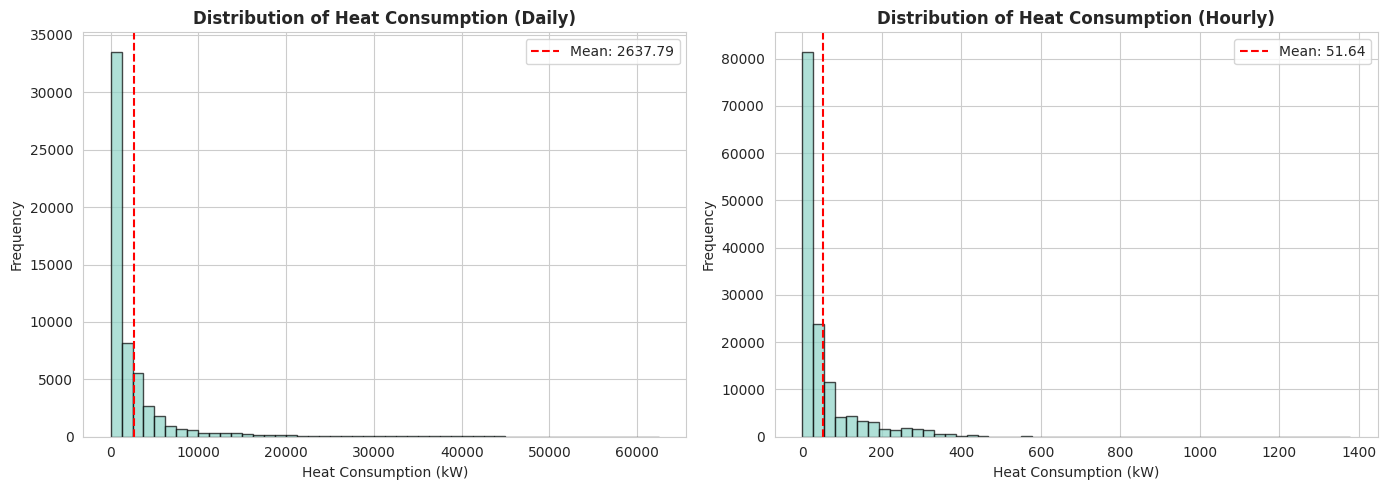

In [11]:
# Distribution of heat consumption
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Daily
axes[0].hist(daily_df['diff'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Heat Consumption (Daily)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Heat Consumption (kW)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(daily_df['diff'].mean(), color='red', linestyle='--', label=f'Mean: {daily_df["diff"].mean():.2f}')
axes[0].legend()

# Hourly
axes[1].hist(hourly_df['diff'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Heat Consumption (Hourly)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Heat Consumption (kW)')
axes[1].set_ylabel('Frequency')
axes[1].axvline(hourly_df['diff'].mean(), color='red', linestyle='--', label=f'Mean: {hourly_df["diff"].mean():.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

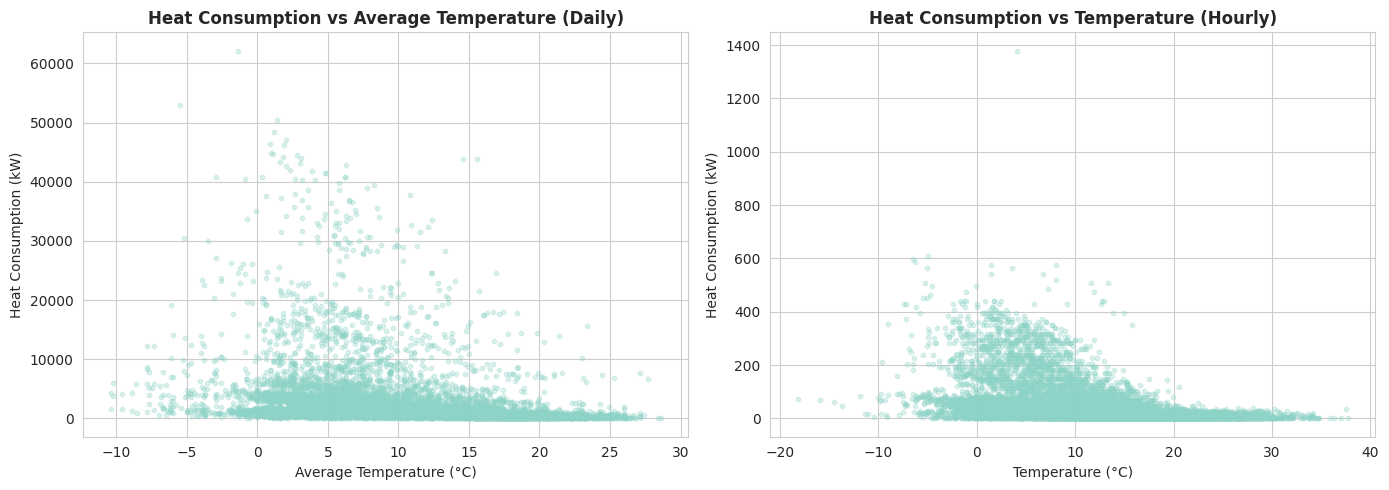

In [12]:
# Relationship between temperature and heat consumption
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Daily - using tavg
sample_daily = daily_df.sample(min(10000, len(daily_df)), random_state=42)
axes[0].scatter(sample_daily['tavg'], sample_daily['diff'], alpha=0.3, s=10)
axes[0].set_title('Heat Consumption vs Average Temperature (Daily)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Average Temperature (°C)')
axes[0].set_ylabel('Heat Consumption (kW)')

# Hourly - using temp
sample_hourly = hourly_df.sample(min(10000, len(hourly_df)), random_state=42)
axes[1].scatter(sample_hourly['temp'], sample_hourly['diff'], alpha=0.3, s=10)
axes[1].set_title('Heat Consumption vs Temperature (Hourly)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Temperature (°C)')
axes[1].set_ylabel('Heat Consumption (kW)')

plt.tight_layout()
plt.show()

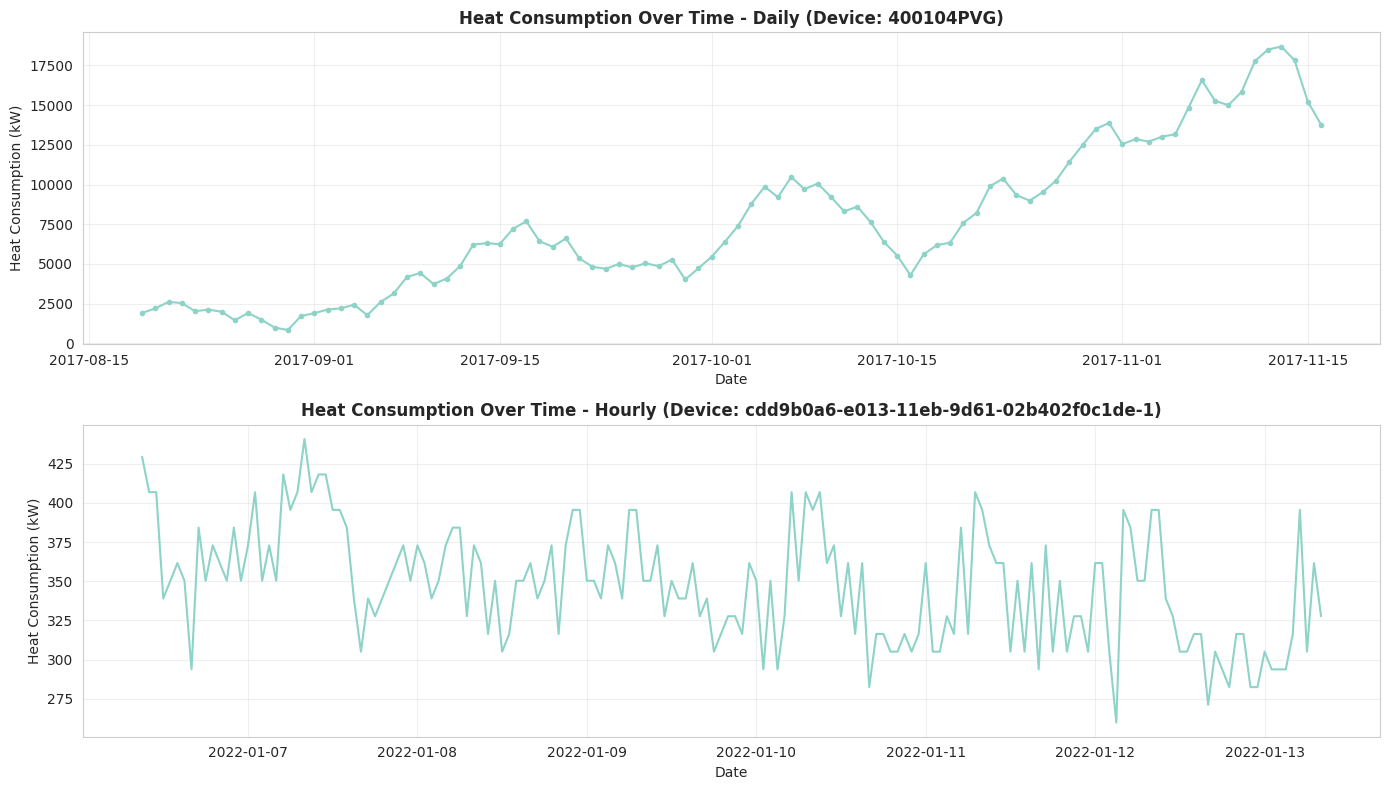

In [13]:
# Time series example for a single device
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Daily - pick a device with enough data
device_daily = daily_df.groupby('id').size().idxmax()
device_daily_data = daily_df[daily_df['id'] == device_daily].sort_values('datetime').head(90)
axes[0].plot(device_daily_data['datetime'], device_daily_data['diff'], marker='o', markersize=3)
axes[0].set_title(f'Heat Consumption Over Time - Daily (Device: {device_daily})', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Heat Consumption (kW)')
axes[0].grid(True, alpha=0.3)

# Hourly - pick a device with enough data
device_hourly = hourly_df.groupby('id').size().idxmax()
device_hourly_data = hourly_df[hourly_df['id'] == device_hourly].sort_values('datetime').head(168)  # 1 week
axes[1].plot(device_hourly_data['datetime'], device_hourly_data['diff'])
axes[1].set_title(f'Heat Consumption Over Time - Hourly (Device: {device_hourly})', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Heat Consumption (kW)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary & Key Insights

### Data Structure
Both datasets follow a similar structure with:
- **Target variable**: `diff` (heat consumption in kW)
- **Input features**: Weather data, building characteristics, temporal features, and historical consumption
- **Lagged features**: Past consumption values used as autoregressive features
- **Future features**: Ground truth values for the forecast horizon (used during training)

### Feature Engineering
The datasets include sophisticated feature engineering:
1. **Cyclical encoding**: Sin/cos transformations for temporal features (day of month, weekday)
2. **One-hot encoding**: Building types and primary energy sources
3. **Autoregressive features**: Historical consumption values (7 days or 72 hours)
4. **Weather features**: Comprehensive meteorological data from Meteostat
5. **Building metadata**: Physical characteristics that influence heat consumption

## Feature Clarifications

Based on analysis of the codebase in `src/energy_forecast/data_processing/`:

### Building Type Categories

The `typ_*` columns are one-hot encoded building types. The original text values are converted to numeric labels using `sklearn.preprocessing.LabelEncoder` (alphabetically sorted), then one-hot encoded:

- **typ_0**: **Mehrfamilienhaus** (Multi-family house / Apartment building) - Most common type
- **typ_1**: **Museum** 
- **typ_2**: **Schule** (School)
- **typ_3**: **Sozialbau** (Social housing) - **NOT IN FINAL DATASET** (filtered during data cleaning)
- **typ_4**: **Studentenwohnheim** (Student dormitory)

The Sozialbau category was removed because only one building of this type existed, and it was likely filtered out during the data quality cleaning process.

**Source**: 
- District heating buildings: Assigned in `src/energy_forecast/data_processing/data_loader.py` (lines 485-489)
- Kinergy buildings: From metadata in `data/interim/meta/kinergy_meta.csv`
- Encoding: `src/energy_forecast/dataset.py` (line 174)

### Weather Condition Code (coco)

The `coco` column in the hourly dataset represents the weather condition code from Meteostat:

According to Meteostat documentation, common condition codes include:
- **1**: Clear
- **2**: Fair
- **3**: Cloudy
- **4**: Overcast
- **5**: Fog
- **7**: Rain
- **8**: Light rain
- **9**: Heavy rain
- **10+**: Various precipitation types (snow, sleet, etc.)

**Source**: Weather data fetched from Meteostat API in `src/energy_forecast/data_processing/feature_generation.py`